In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data and plotting imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.float_format', '{:0.0f}'.format)

In [3]:
epl = pd.read_csv('EPL_Set.csv')


In [4]:
epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9664 entries, 0 to 9663
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       9664 non-null   object 
 1   Date      9664 non-null   object 
 2   HomeTeam  9664 non-null   object 
 3   AwayTeam  9664 non-null   object 
 4   FTHG      9664 non-null   int64  
 5   FTAG      9664 non-null   int64  
 6   FTR       9664 non-null   object 
 7   HTHG      8740 non-null   float64
 8   HTAG      8740 non-null   float64
 9   HTR       8740 non-null   object 
 10  Season    9664 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 830.6+ KB


STATISTICAL SUMMARY

In [5]:
epl.describe()

,FTHG,FTAG,HTHG,HTAG
count,9664,9664,8740,8740
mean,2,1,1,0
std,1,1,1,1
min,0,0,0,0
25%,1,0,0,0
50%,1,1,0,0
75%,2,2,1,1
max,9,8,5,5


In [6]:
epl

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
4,E0,14/08/93,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94
...,...,...,...,...,...,...,...,...,...,...,...
9659,E0,13/05/18,Newcastle,Chelsea,3,0,H,1,0,H,2017-18
9660,E0,13/05/18,Southampton,Man City,0,1,A,0,0,D,2017-18
9661,E0,13/05/18,Swansea,Stoke,1,2,A,1,2,A,2017-18
9662,E0,13/05/18,Tottenham,Leicester,5,4,H,1,2,A,2017-18


In [7]:
epl = epl.drop(['Div'], axis = 1)

SELECTING SEASONS OF INTEREST

In [8]:
epl['Season'].unique()

array(['1993-94', '1994-95', '1995-96', '1996-97', '1997-98', '1998-99',
       '1999-00', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17',
       '2017-18'], dtype=object)

In [9]:
epl_filtered= epl[epl['Season'].isin(['2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18'])]


In [10]:
epl_filtered

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
6624,14/08/10,Aston Villa,West Ham,3,0,H,2,0,H,2010-11
6625,14/08/10,Blackburn,Everton,1,0,H,1,0,H,2010-11
6626,14/08/10,Bolton,Fulham,0,0,D,0,0,D,2010-11
6627,14/08/10,Chelsea,West Brom,6,0,H,2,0,H,2010-11
6628,14/08/10,Sunderland,Birmingham,2,2,D,1,0,H,2010-11
...,...,...,...,...,...,...,...,...,...,...
9659,13/05/18,Newcastle,Chelsea,3,0,H,1,0,H,2017-18
9660,13/05/18,Southampton,Man City,0,1,A,0,0,D,2017-18
9661,13/05/18,Swansea,Stoke,1,2,A,1,2,A,2017-18
9662,13/05/18,Tottenham,Leicester,5,4,H,1,2,A,2017-18


GOALS RANKING

In [13]:
def get_goals_data(season):
    # Filter data for the specified season
    season_data = epl_filtered[epl_filtered['Season'] == season]
    
    # Goals scored by each team
    home_goals = season_data.groupby('HomeTeam')['FTHG'].sum().reset_index().rename(columns={'HomeTeam': 'Team', 'FTHG': 'GoalsScored'})
    away_goals = season_data.groupby('AwayTeam')['FTAG'].sum().reset_index().rename(columns={'AwayTeam': 'Team', 'FTAG': 'GoalsScored'})
    goals_scored = pd.concat([home_goals, away_goals]).groupby('Team')['GoalsScored'].sum().reset_index()

    # Goals conceded by each team
    home_conceded = season_data.groupby('HomeTeam')['FTAG'].sum().reset_index().rename(columns={'HomeTeam': 'Team', 'FTAG': 'GoalsConceded'})
    away_conceded = season_data.groupby('AwayTeam')['FTHG'].sum().reset_index().rename(columns={'AwayTeam': 'Team', 'FTHG': 'GoalsConceded'})
    goals_conceded = pd.concat([home_conceded, away_conceded]).groupby('Team')['GoalsConceded'].sum().reset_index()

    # Merge goals scored and conceded data
    goals_data = pd.merge(goals_scored, goals_conceded, on='Team')

    # Calculate goal difference
    goals_data['GoalDifference'] = goals_data['GoalsScored'] - goals_data['GoalsConceded']

    # Rank teams based on goal difference
    goals_data['Rank'] = goals_data['GoalDifference'].rank(ascending=False, method='min').astype(int)
    
    # Sort the DataFrame by rank
    goals_data = goals_data.sort_values(by='Rank')
    
    return goals_data

# Example usage:
goals_data_season = get_goals_data('2017-18')
goals_data_season


,Team,GoalsScored,GoalsConceded,GoalDifference,Rank
10,Man City,106,27,79,1
9,Liverpool,84,38,46,2
11,Man United,68,28,40,3
16,Tottenham,74,36,38,4
4,Chelsea,62,38,24,5
0,Arsenal,74,51,23,6
3,Burnley,36,39,-3,7
8,Leicester,56,60,-4,8
12,Newcastle,39,47,-8,9
5,Crystal Palace,45,55,-10,10


In [14]:
# Set background and palette
sns.set(rc={"axes.facecolor": "#E0FFFF", "figure.facecolor": "#E0FFFF"})
custom_palette = ["#FF6347", "#32CD32", "#4169E1", "#FFD700", "#FF69B4", "#00FFFF"]
sns.set_palette(custom_palette)

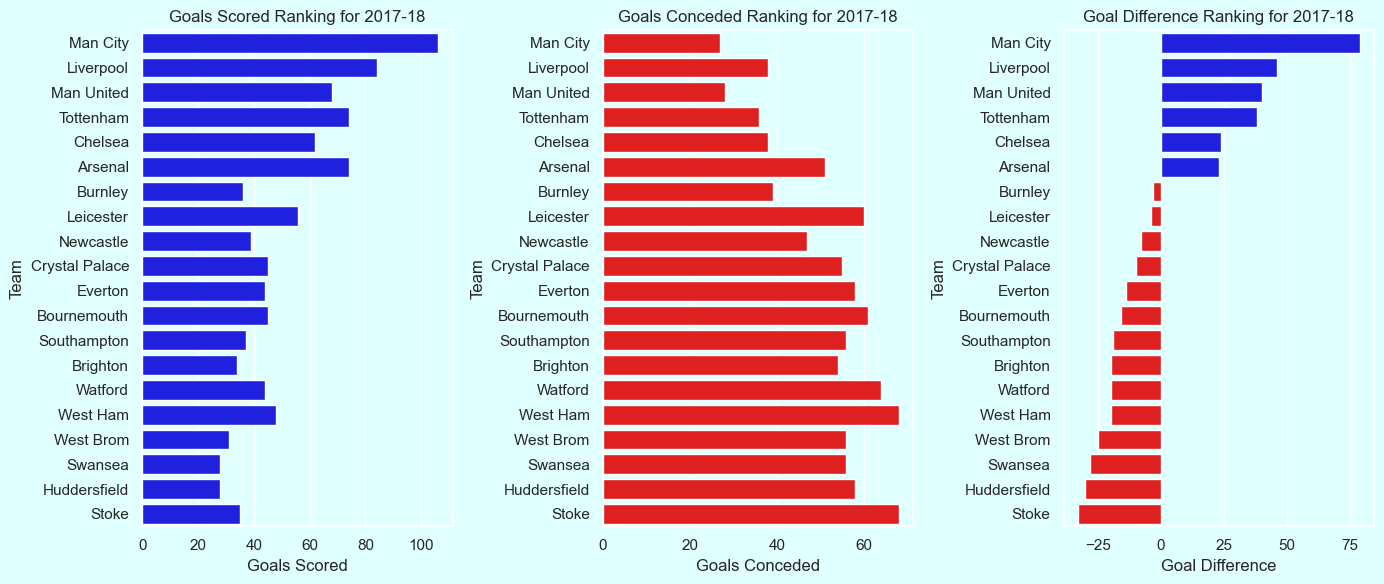

In [15]:

def plot_goals_rankings(season):
    # Get goals data for the season
    goals_data = get_goals_data(season)
    
    # Sort the data based on goal difference
    goals_data_sorted = goals_data.sort_values(by='GoalDifference', ascending=False)

    # Plotting goals scored
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 3, 1)
    sns.barplot(x='GoalsScored', y='Team', data=goals_data_sorted, color='blue')
    plt.xlabel('Goals Scored')
    plt.ylabel('Team')
    plt.title(f'Goals Scored Ranking for {season}')

    # Plotting goals conceded
    plt.subplot(1, 3, 2)
    sns.barplot(x='GoalsConceded', y='Team', data=goals_data_sorted, color='red')
    plt.xlabel('Goals Conceded')
  #  plt.ylabel('Team')
    plt.title(f'Goals Conceded Ranking for {season}')

    # Plotting goal difference
    plt.subplot(1, 3, 3)
    goal_diff_colors = ['blue' if x >= 0 else 'red' for x in goals_data_sorted['GoalDifference']]
    sns.barplot(x='GoalDifference', y='Team', data=goals_data_sorted, palette=goal_diff_colors)
    plt.xlabel('Goal Difference')
   # plt.ylabel('Team')
    plt.title(f'Goal Difference Ranking for {season}')

    plt.tight_layout()
    
    plt.savefig('Sport goals 18.png', bbox_inches='tight')

    plt.show()

# Example usage:
plot_goals_rankings('2017-18')


Ranking teams by Home wins for Each Season

In [16]:
def get_home_wins(season):
    # Filter data for the specified season
    season_data =  epl_filtered[epl_filtered['Season'] == season]
    
    # Get the number of home wins for each team
    home_wins = season_data[season_data['FTR'] == 'H']['HomeTeam'].value_counts().reset_index()
    home_wins.columns = ['Team', 'HomeWins']
    
    return home_wins
Home_wins_rank = get_home_wins('2014-15')
Home_wins_rank

,Team,HomeWins
0,Chelsea,15
1,Man City,14
2,Man United,14
3,Arsenal,12
4,Southampton,11
5,Stoke,10
6,Tottenham,10
7,Liverpool,10
8,West Ham,9
9,Swansea,9


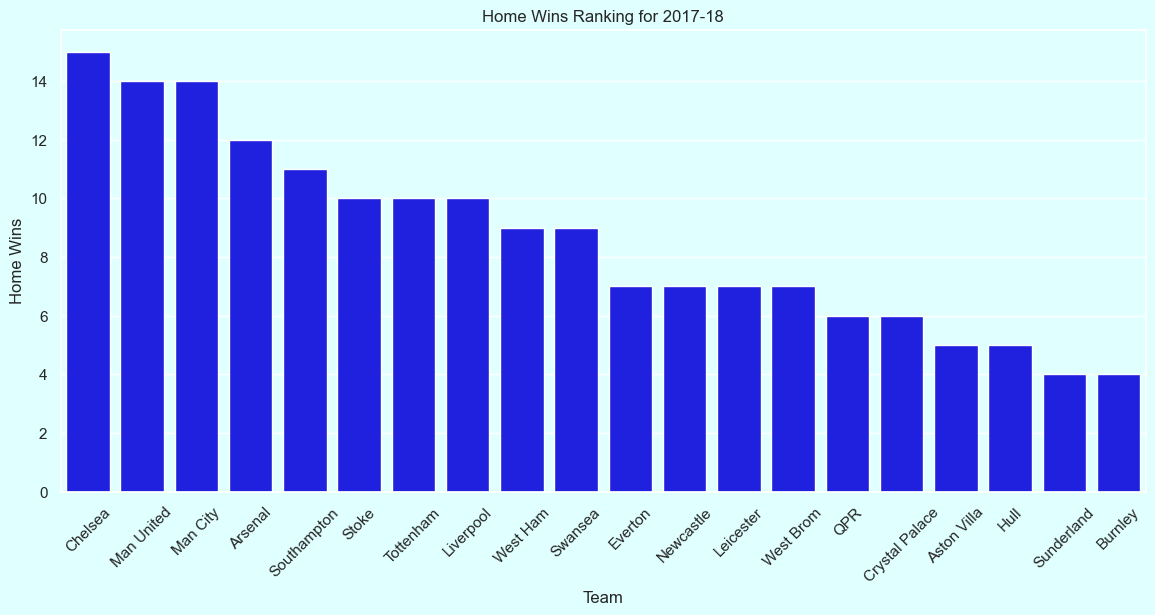

In [21]:

def plot_HomeWins_rankings(season):
    
    
    # Sort teams by home wins
    Home_wins_sorted = Home_wins_rank.sort_values(by='HomeWins', ascending=False)

    # Plotting home wins
    plt.figure(figsize=(14, 6))
    sns.barplot(x='Team', y='HomeWins', data=Home_wins_sorted, color='blue')
    plt.xlabel('Team')
    plt.ylabel('Home Wins')
    plt.xticks(rotation=45)
    plt.title(f'Home Wins Ranking for {season}')
    
    plt.savefig('Sport HW2.png', bbox_inches='tight')

    plt.show()

# Example usage:
plot_HomeWins_rankings('2017-18')

CREATING LEAGUE TABLE 

In [22]:
def create_league_table(season):
    # Filter data for the specified season
    season_data = epl_filtered[epl_filtered['Season'] == season]
    
    # Calculate matches played
    matches_played = season_data['HomeTeam'].value_counts().add(season_data['AwayTeam'].value_counts(), fill_value=0).reset_index()
    matches_played.columns = ['Team', 'MatchesPlayed']
    
    # Goals scored by each team
    home_goals = season_data.groupby('HomeTeam')['FTHG'].sum().reset_index().rename(columns={'HomeTeam': 'Team', 'FTHG': 'GoalsScored'})
    away_goals = season_data.groupby('AwayTeam')['FTAG'].sum().reset_index().rename(columns={'AwayTeam': 'Team', 'FTAG': 'GoalsScored'})
    goals_scored = pd.concat([home_goals, away_goals]).groupby('Team')['GoalsScored'].sum().reset_index()

    # Goals conceded by each team
    home_conceded = season_data.groupby('HomeTeam')['FTAG'].sum().reset_index().rename(columns={'HomeTeam': 'Team', 'FTAG': 'GoalsConceded'})
    away_conceded = season_data.groupby('AwayTeam')['FTHG'].sum().reset_index().rename(columns={'AwayTeam': 'Team', 'FTHG': 'GoalsConceded'})
    goals_conceded = pd.concat([home_conceded, away_conceded]).groupby('Team')['GoalsConceded'].sum().reset_index()

    # Calculate wins, draws, and losses
    wins_home = season_data[season_data['FTR'] == 'H'].groupby('HomeTeam').size().reset_index(name='Wins')
    wins_away = season_data[season_data['FTR'] == 'A'].groupby('AwayTeam').size().reset_index(name='Wins')
    wins = wins_home.rename(columns={'HomeTeam': 'Team'}).merge(wins_away.rename(columns={'AwayTeam': 'Team'}), on='Team', how='outer').fillna(0)
    wins['Wins'] = wins['Wins_x'] + wins['Wins_y']
    wins = wins[['Team', 'Wins']]
    
    draws_home = season_data[season_data['FTR'] == 'D'].groupby('HomeTeam').size().reset_index(name='Draws')
    draws_away = season_data[season_data['FTR'] == 'D'].groupby('AwayTeam').size().reset_index(name='Draws')
    draws = draws_home.rename(columns={'HomeTeam': 'Team'}).merge(draws_away.rename(columns={'AwayTeam': 'Team'}), on='Team', how='outer').fillna(0)
    draws['Draws'] = draws['Draws_x'] + draws['Draws_y']
    draws = draws[['Team', 'Draws']]

    losses_home = season_data[season_data['FTR'] == 'A'].groupby('HomeTeam').size().reset_index(name='Losses')
    losses_away = season_data[season_data['FTR'] == 'H'].groupby('AwayTeam').size().reset_index(name='Losses')
    losses = losses_home.rename(columns={'HomeTeam': 'Team'}).merge(losses_away.rename(columns={'AwayTeam': 'Team'}), on='Team', how='outer').fillna(0)
    losses['Losses'] = losses['Losses_x'] + losses['Losses_y']
    losses = losses[['Team', 'Losses']]

    # Merge data
    league_table = pd.merge(goals_scored, goals_conceded, on='Team')
    league_table = pd.merge(league_table, wins, on='Team')
    league_table = pd.merge(league_table, draws, on='Team')
    league_table = pd.merge(league_table, losses, on='Team')
    league_table = pd.merge(league_table, matches_played, on='Team')
    
    
      # Calculate points and rank teams
    league_table['Points'] = league_table['Wins'] * 3 + league_table['Draws']
    
    # Calculate goal difference
    league_table['GoalDifference'] = league_table['GoalsScored'] - league_table['GoalsConceded']

    # Sort teams based on points
    league_table = league_table.sort_values(by='Points', ascending=False)

    # Remove index
    league_table.reset_index(drop=True, inplace=True)
    
    # Add rank
    league_table['Rank'] = range(1, len(league_table) + 1)
    
    return league_table

# Example usage:
league_table_season = create_league_table('2017-18')

league_table_season

,Team,GoalsScored,GoalsConceded,Wins,Draws,Losses,MatchesPlayed,Points,GoalDifference,Rank
0,Man United,86,43,28,5,5,38,89,43,1
1,Man City,66,34,23,9,6,38,78,32,2
2,Chelsea,75,39,22,9,7,38,75,36,3
3,Arsenal,72,37,21,10,7,38,73,35,4
4,Tottenham,66,46,21,9,8,38,72,20,5
5,Everton,55,40,16,15,7,38,63,15,6
6,Liverpool,71,43,16,13,9,38,61,28,7
7,West Brom,53,57,14,7,17,38,49,-4,8
8,West Ham,45,53,12,10,16,38,46,-8,9
9,Swansea,47,51,11,13,14,38,46,-4,10


VISUALIZING RANK CHANGES FOR EACH SEASON

    Season  Rank
0  2010-11     3
1  2011-12     6
2  2012-13     3
3  2013-14     3
4  2014-15     1


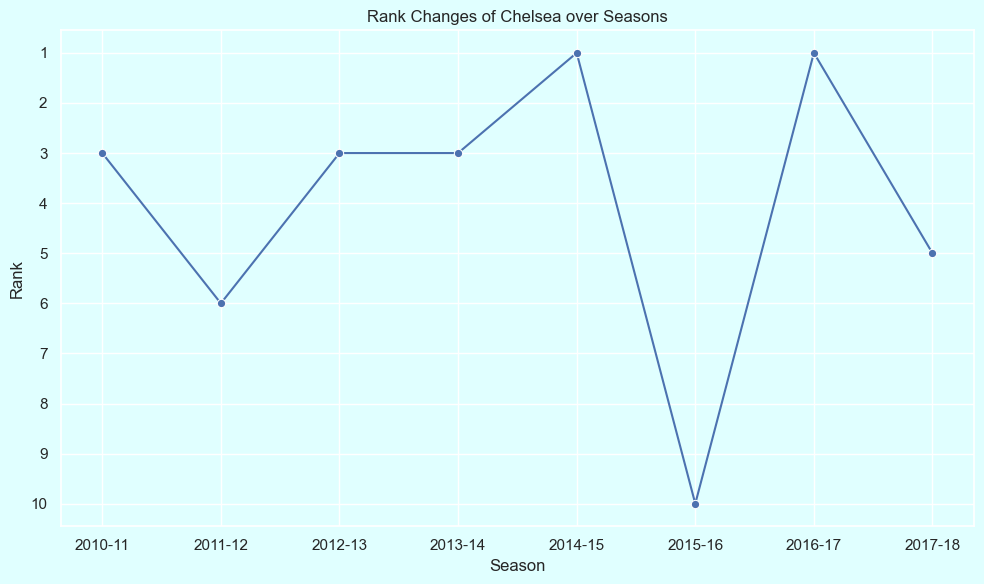

In [23]:

def plot_rank_changes(team_name):
    ranks = []

    # loop over each season and calculate the rank of the team
    for season in epl_filtered['Season'].unique():
        league_table = create_league_table(season)
        team_row = league_table[league_table['Team'] == team_name]
        
        # If team not found in the league table, set its rank to NaN
        if team_row.empty:
            ranks.append(float('nan'))
        else:
            rank = team_row['Rank'].values[0]
            ranks.append(rank)

    # Create a DataFrame for plotting
    df = pd.DataFrame({'Season': epl_filtered['Season'].unique(), 'Rank': ranks})
    
  
    print(df.head())  # Print the first few rows of the DataFrame
    
    # Plot the rank changes using Seaborn
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='Season', y='Rank', marker='o', color='b')
    plt.title(f'Rank Changes of {team_name} over Seasons')
    plt.xlabel('Season')
    plt.ylabel('Rank')
    #plt.xticks(rotation=45)
    plt.yticks(range(1, 11))
    plt.gca().invert_yaxis()  # Invert the y-axis
    plt.grid(True)
    plt.tight_layout()
    
    plt.savefig('Sport rank che.png', bbox_inches='tight')
    
    plt.show()
plot_rank_changes('Chelsea')

    Season  Rank
0  2010-11     1
1  2011-12     2
2  2012-13     1
3  2013-14     7
4  2014-15     4


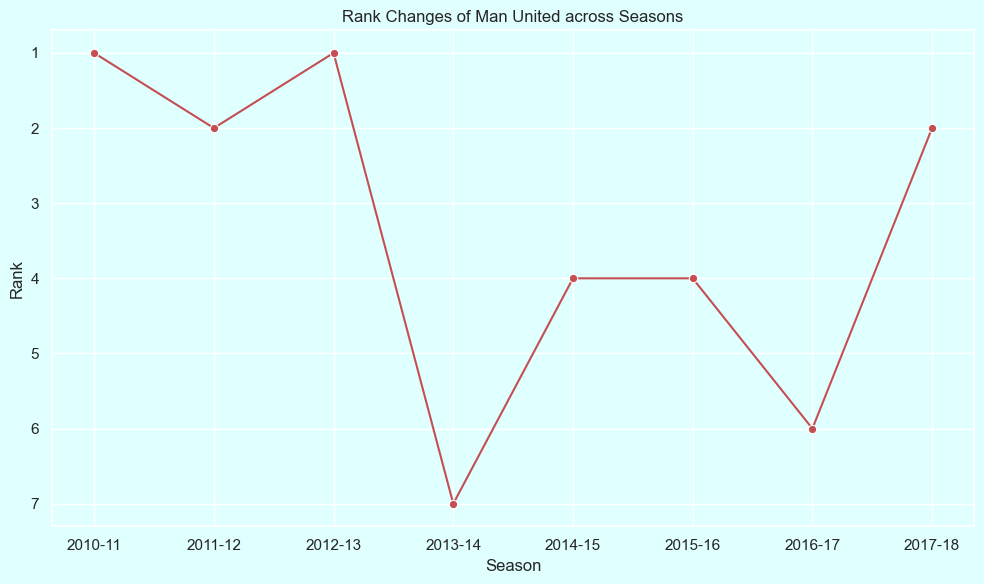

In [24]:
def plot_rank_changes(team_name):
    ranks = []

    # Iterate over each season and calculate the rank of the team
    for season in epl_filtered['Season'].unique():
        league_table = create_league_table(season)
        team_row = league_table[league_table['Team'] == team_name]
        
        # If team not found in the league table, set its rank to NaN
        if team_row.empty:
            ranks.append(float('nan'))
        else:
            rank = team_row['Rank'].values[0]
            ranks.append(rank)

    # Create a DataFrame for plotting
    df = pd.DataFrame({'Season': epl_filtered['Season'].unique(), 'Rank': ranks})
    
   
    print(df.head()) 
    
    # Plot the rank changes using Seaborn
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='Season', y='Rank', marker='o', color='r')
    plt.title(f'Rank Changes of {team_name} across Seasons')
    plt.xlabel('Season')
    plt.ylabel('Rank')
    #plt.xticks(rotation=45)
    plt.gca().invert_yaxis()  # Invert the y-axis
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('Sport rank man.png', bbox_inches='tight')
    plt.show()
plot_rank_changes('Man United')

VISUALIZING MULTIPLE TEAMS' RANK OVER SEASONS

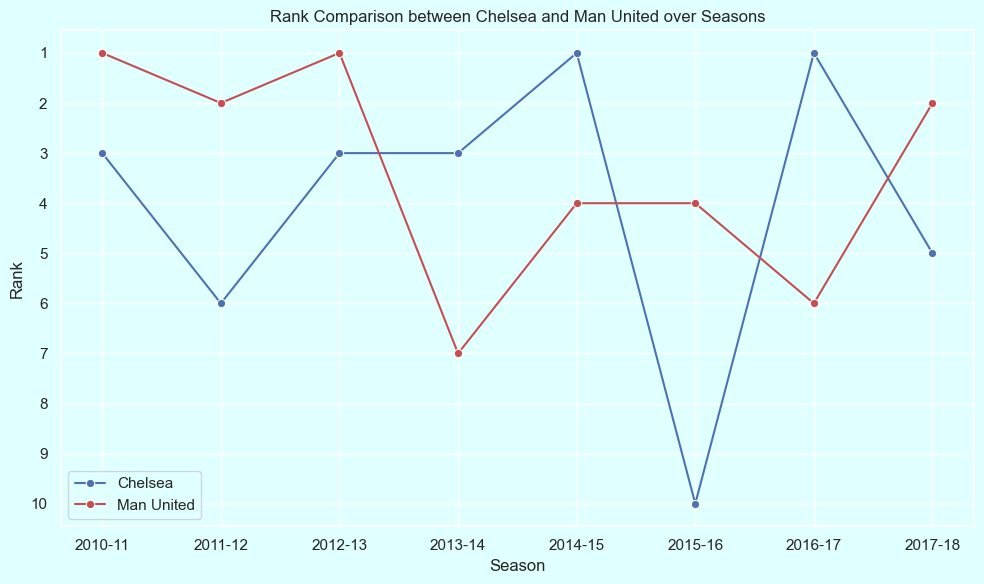

In [27]:
#Crete an empty dictionary
def plot_rank_comparison(team1_name, team2_name):
    ranks_team1 = []
    ranks_team2 = []

    # loop over each season and calculate the rank of the teams
    for season in epl_filtered['Season'].unique():
        league_table = create_league_table(season)
        team1_row = league_table[league_table['Team'] == team1_name]
        team2_row = league_table[league_table['Team'] == team2_name]
        
        # If teams not found in the league table, set their ranks to NaN
        if team1_row.empty:
            ranks_team1.append(float('nan'))
        else:
            ranks_team1.append(team1_row['Rank'].values[0])
        
        if team2_row.empty:
            ranks_team2.append(float('nan'))
        else:
            ranks_team2.append(team2_row['Rank'].values[0])

    # DataFrame for plotting
    df = pd.DataFrame({'Season': epl_filtered['Season'].unique(), f'{team1_name}_Rank': ranks_team1, f'{team2_name}_Rank': ranks_team2})
    
    # Plot the rank comparison using Seaborn
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='Season', y=f'{team1_name}_Rank', marker='o', color='b', label=team1_name)
    sns.lineplot(data=df, x='Season', y=f'{team2_name}_Rank', marker='o', color='r', label=team2_name)
    plt.title(f'Rank Comparison between {team1_name} and {team2_name} over Seasons')
    plt.xlabel('Season')
    plt.ylabel('Rank')
    plt.legend()
    #plt.xticks(rotation=45)
    plt.yticks(range(1, 11))
    plt.gca().invert_yaxis()  # Invert the y-axis
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('Sport rank both1.png', bbox_inches='tight')
    plt.show()
plot_rank_comparison('Chelsea', 'Man United')
